# The Watershed algorithm

In [16]:
from scipy import ndimage as ndi

In [17]:
from skimage.morphology import watershed, disk

In [18]:
from skimage import data, io

In [19]:
from skimage.filters import rank

In [20]:
from skimage.util import img_as_ubyte

In [21]:
from skimage.color import rgb2gray

In [22]:
import matplotlib.pyplot as plt

In [23]:
img=data.astronaut()  # Read the image that you want to watershed segment

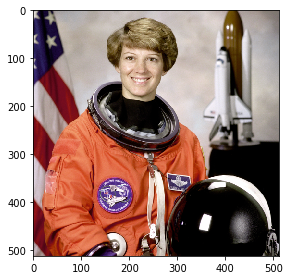

In [24]:
io.imshow(img)

In [25]:
img_gray=rgb2gray(img) # Convert it into grayscale 

In [26]:
image=img_as_ubyte(img_gray) # Convert the image pixel values to unsigned int using the img_as_ubyte() function.

In [56]:
markers1=rank.gradient(image, disk(5)) <30
 # Calculate the local gradients of the image
#and only select the points that have a
#gradient value of less than 20


In [57]:
markers1 = ndi.label(markers1)[0]  # change the original gradient image to color space

In [58]:
gradient = rank.gradient(image, disk(1))
labels = watershed(gradient, markers1)  # watershed

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


C:\Users\user\AppData\Roaming\Python\Python38\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


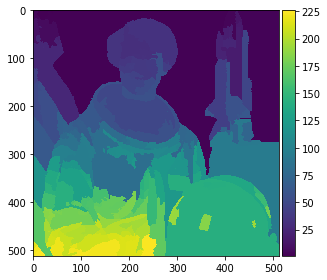

In [59]:
io.imshow(labels)

# Superpixels 

In [60]:
from skimage import segmentation, color

In [61]:
from skimage.io import imread

In [62]:
from skimage.future import graph

In [63]:
from matplotlib import pyplot as plt

In [64]:
img = imread('img/animal.png') #read in the image

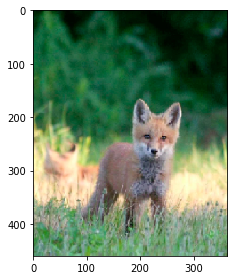

In [65]:
io.imshow(img) #display the read in image

In [66]:
img_segments = segmentation.slic(img, compactness=20, n_segments=500)

<ipython-input-66-0027518b08e8>:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  img_segments = segmentation.slic(img, compactness=20, n_segments=500)


In [67]:
superpixels = color.label2rgb(img_segments, img, kind='avg')  #  superpixels

<ipython-input-67-df7f5e1bde93>:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  superpixels = color.label2rgb(img_segments, img, kind='avg')  #  superpixels


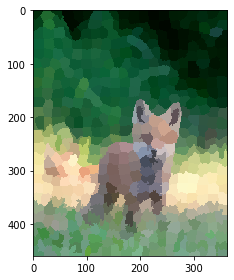

In [68]:
io.imshow(superpixels)

## Normalized graph cut

In [69]:
from skimage import data, segmentation, color, io

In [70]:
from skimage.io import imread

In [71]:
from skimage import data

In [72]:
from skimage.future import graph

In [73]:
img = data.astronaut() # read in the image from data module

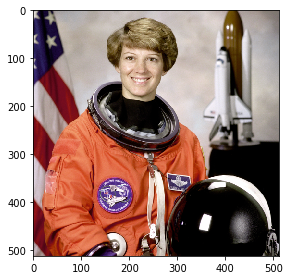

In [74]:
io.imshow(img) #display the read in image

In [75]:
img_segments = segmentation.slic(img, compactness=30, n_segments=50)

<ipython-input-75-1b825532a6a9>:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  img_segments = segmentation.slic(img, compactness=30, n_segments=50)


In [76]:
out1 = color.label2rgb(img_segments, img, kind='avg')
#Perform k-means clustering over color values. In this implementation, it uses the SLIC method for clustering. Similar to superpixels.

<ipython-input-76-734cebb90c2b>:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  out1 = color.label2rgb(img_segments, img, kind='avg')


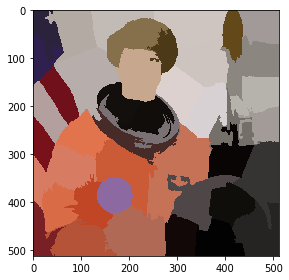

In [77]:
io.imshow(out1)

In [78]:
segment_graph = graph.rag_mean_color(img, img_segments, mode='similarity')
img_cuts = graph.cut_normalized(img_segments, segment_graph)
normalized_cut_segments = color.label2rgb(img_cuts, img, kind='avg') # nomalized graph cut

<ipython-input-78-ce6e59a6882f>:3: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  normalized_cut_segments = color.label2rgb(img_cuts, img, kind='avg') # nomalized graph cut


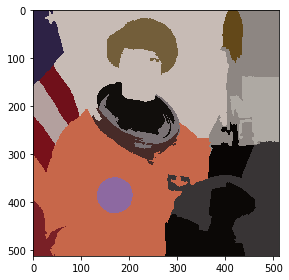

In [79]:
io.imshow(normalized_cut_segments)